In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("Absenteeism_data.csv")

# Preprocess the data
data['Absenteeism Category'] = (data['Absenteeism Time in Hours'] > 3).astype(int)  # Target variable
X = data.drop(['ID', 'Date', 'Absenteeism Time in Hours', 'Absenteeism Category'], axis=1)
y = data['Absenteeism Category']

# Encode categorical variables (if any)
if X.select_dtypes(include=['object']).shape[1] > 0:
    X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5697 - loss: 0.6742 - val_accuracy: 0.6607 - val_loss: 0.6729
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - loss: 0.6216 - val_accuracy: 0.6429 - val_loss: 0.6763
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7100 - loss: 0.6071 - val_accuracy: 0.6429 - val_loss: 0.6728
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7331 - loss: 0.5692 - val_accuracy: 0.6429 - val_loss: 0.6781
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.5661 - val_accuracy: 0.6250 - val_loss: 0.6863
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7482 - loss: 0.5548 - val_accuracy: 0.6071 - val_loss: 0.6870
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.5357 - val_accuracy: 0.6071 - val_loss: 0.6899
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7413 - loss: 0.5293 - val_accuracy: 0.6429 - val_loss

Training with Zero, Activation: sigmoid, Learning Rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.7142857313156128
Training with Zero, Activation: sigmoid, Learning Rate: 0.005
0.7071428298950195
Training with Zero, Activation: sigmoid, Learning Rate: 0.001
0.7142857313156128
Training with Zero, Activation: sigmoid, Learning Rate: 0.0005
0.5857142806053162
Training with Zero, Activation: sigmoid, Learning Rate: 0.0001
0.5857142806053162
Training with Zero, Activation: linear, Learning Rate: 0.01
0.5857142806053162
Training with Zero, Activation: linear, Learning Rate: 0.005
0.5857142806053162
Training with Zero, Activation: linear, Learning Rate: 0.001
0.5857142806053162
Training with Zero, Activation: linear, Learning Rate: 0.0005
0.5857142806053162
Training with Zero, Activation: linear, Learning Rate: 0.0001
0.5857142806053162
Training with Zero, Activation: relu, Learning Rate: 0.01
0.5857142806053162
Training with Zero, Activation: relu, Learning Rate: 0.005
0.5857142806053162
Training with Zero, Activation: relu, Learning Rate: 0.001
0.5857142806053162
Training with Zero, A

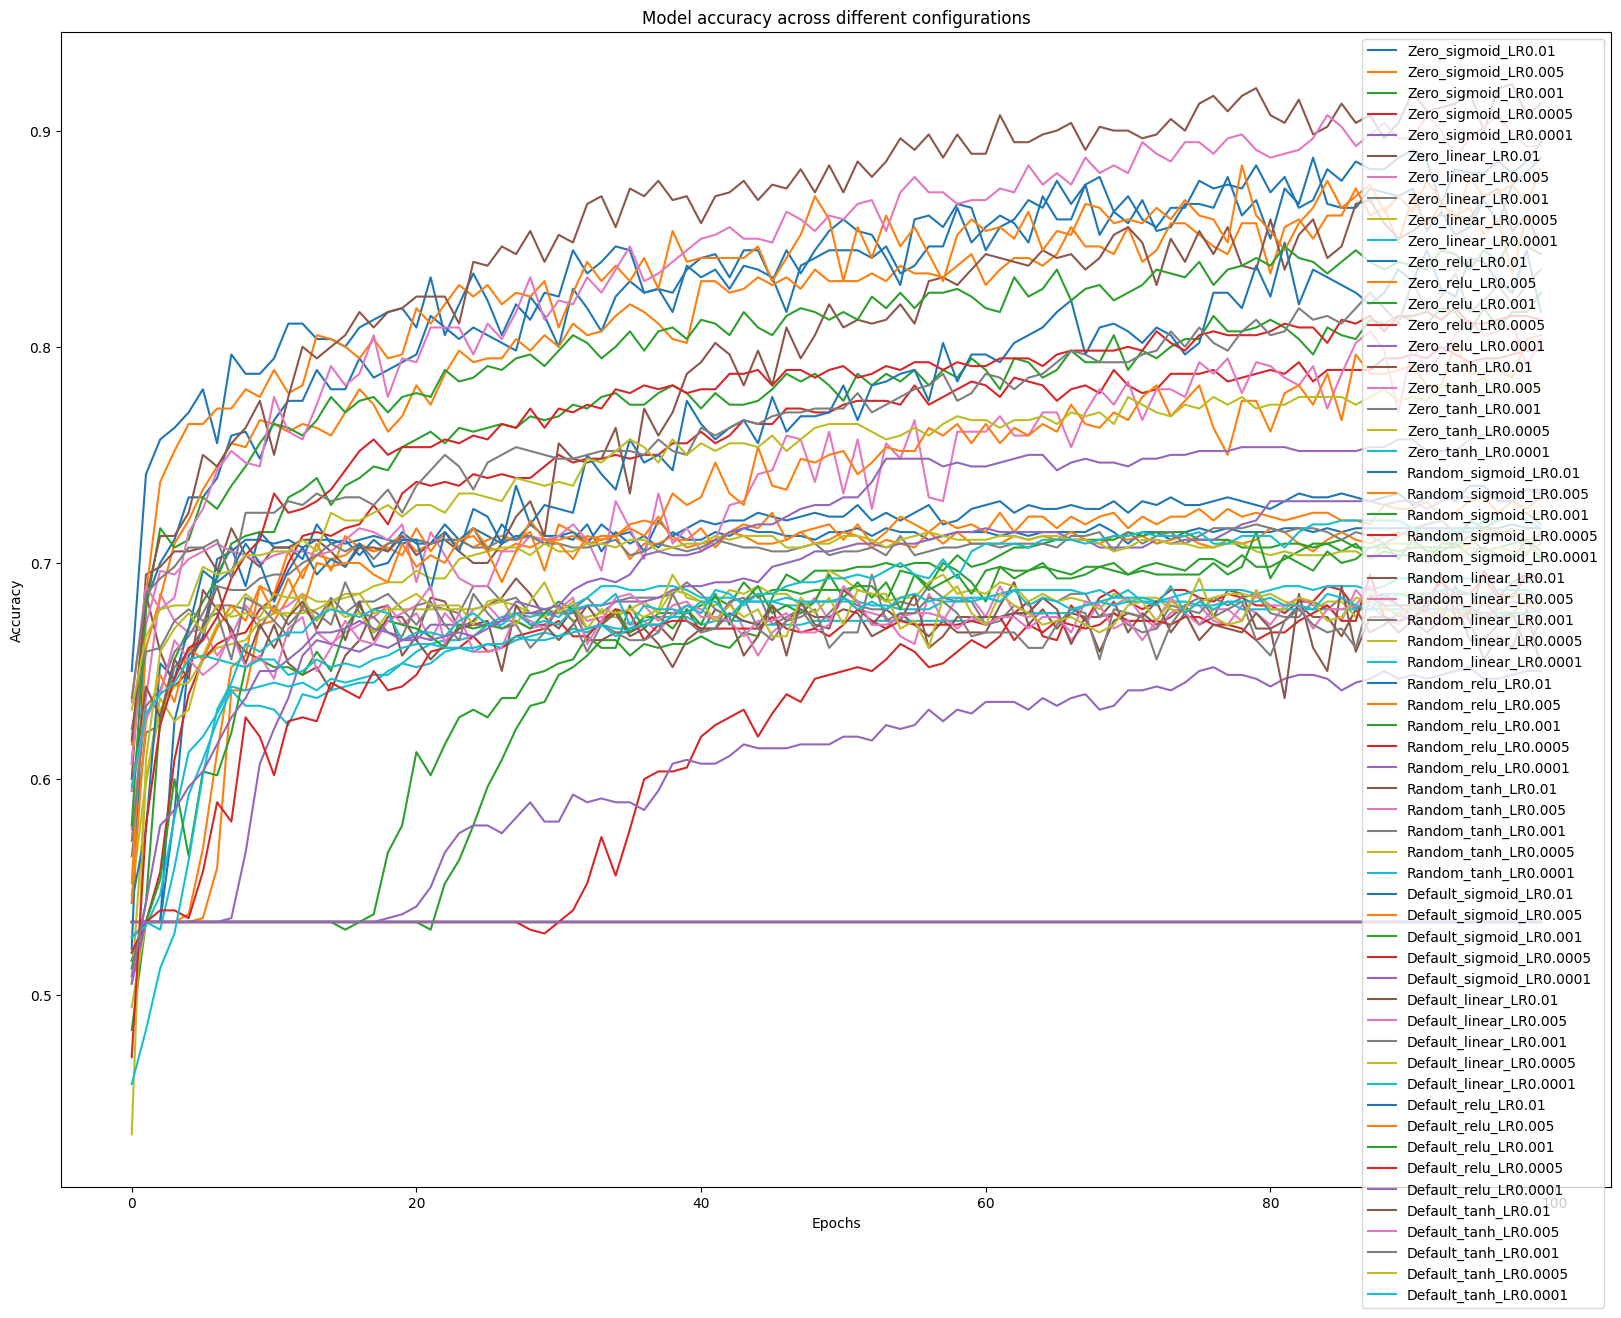

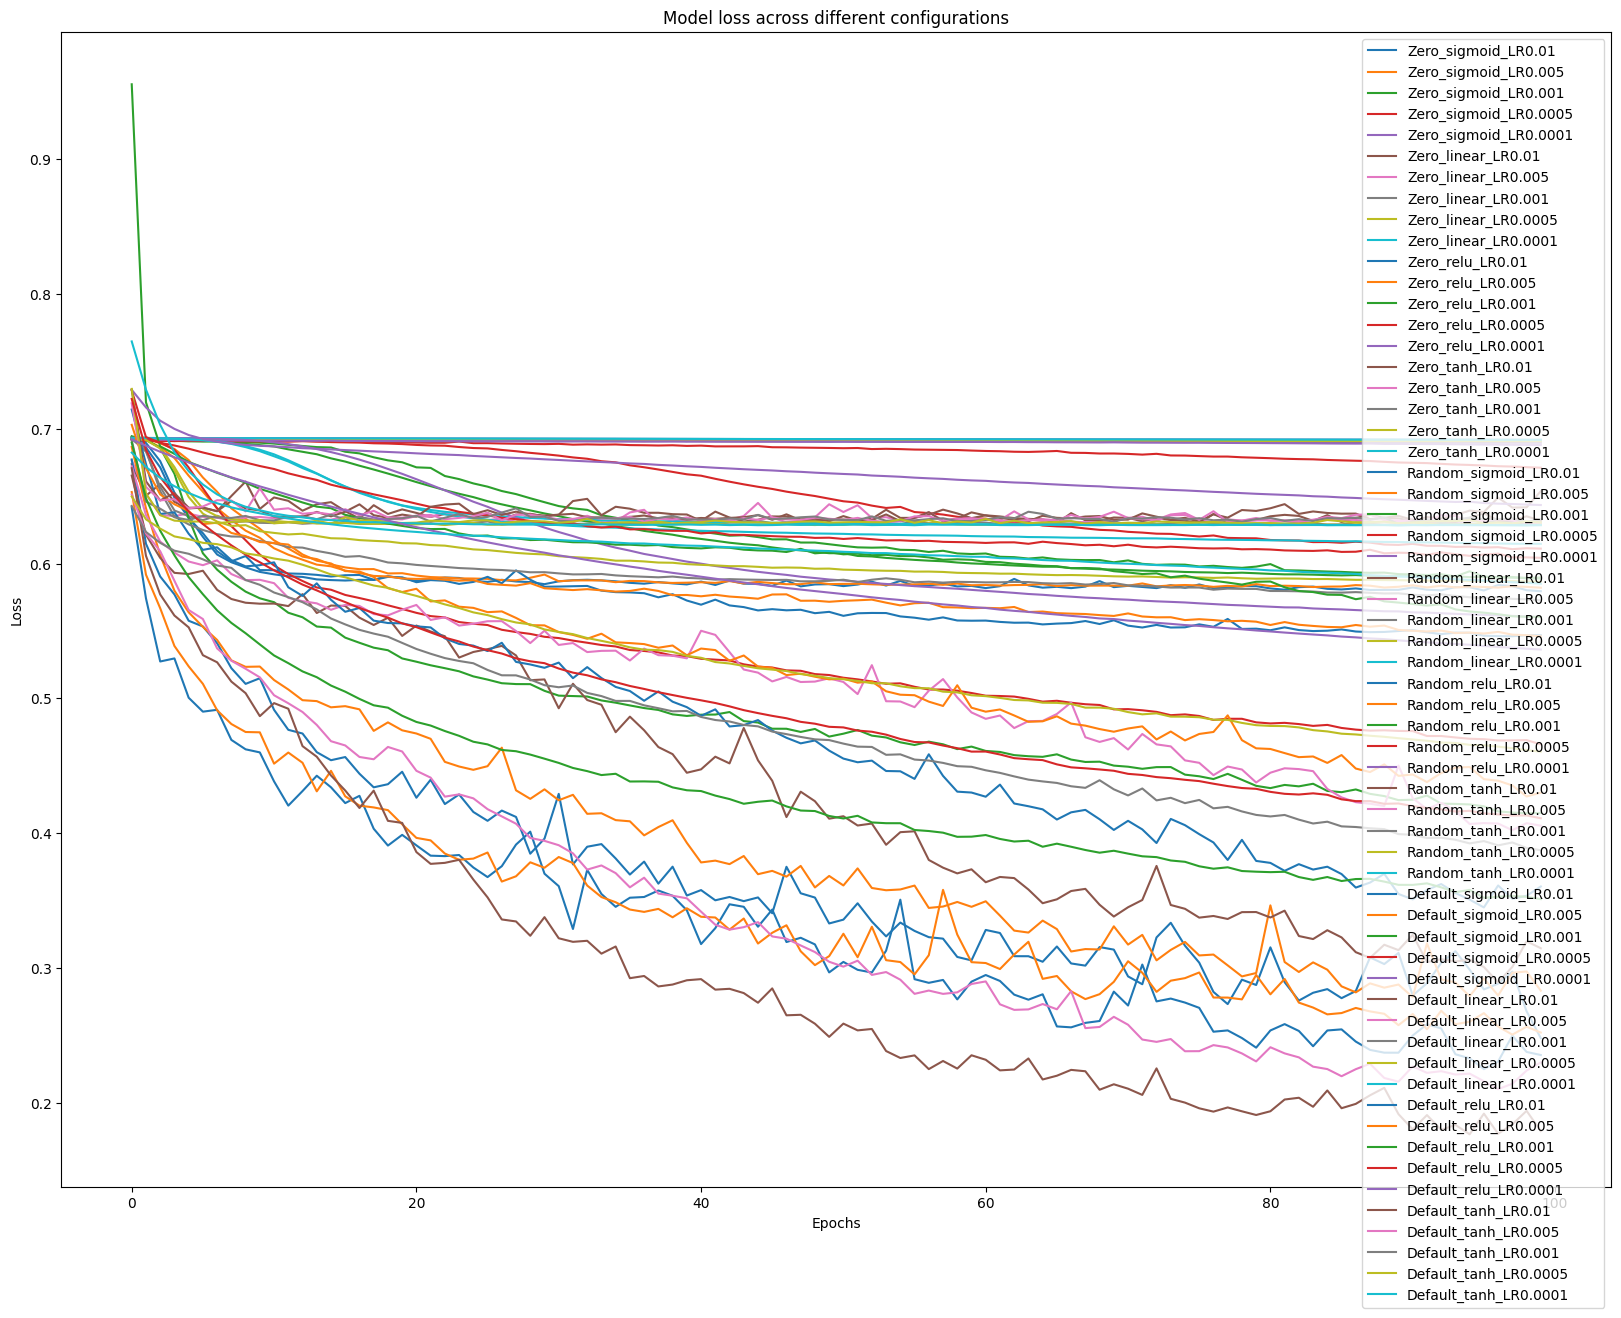

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Absenteeism_data.csv")

# Preprocessing the data
data['Absenteeism Category'] = (data['Absenteeism Time in Hours'] > 3).astype(int)  # Target variable
X = data.drop(['ID', 'Date', 'Absenteeism Time in Hours', 'Absenteeism Category'], axis=1)
y = data['Absenteeism Category']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define custom weight initializations
def initialize_weights_zero(shape, dtype=None):
    return np.zeros(shape)

def initialize_weights_random(shape, dtype=None):
    return np.random.randn(*shape) * 0.01

# Function to build and train the model
def build_and_train_model(initializer, activation, learning_rate, epochs=100, batch_size=32):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation,
              kernel_initializer=initializer),
        Dense(32, activation=activation, kernel_initializer=initializer),
        Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), verbose=0)
    return history

# Experiment parameters
initializers = {'Zero': initialize_weights_zero, 'Random': initialize_weights_random, 'Default': 'glorot_uniform'}
activations = ['sigmoid', 'linear', 'relu', 'tanh']
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]

# Store results
results = {}

# Perform experiments
for initializer_name, initializer in initializers.items():
    for activation in activations:
        for lr in learning_rates:
            print(f"Training with {initializer_name}, Activation: {activation}, Learning Rate: {lr}")
            history = build_and_train_model(initializer=initializer, activation=activation,
                                            learning_rate=lr, epochs=100)
            key = f"{initializer_name}_{activation}_LR{lr}"
            results[key] = history.history
            print(history.history['val_accuracy'][-1])

# Plot results
def plot_results(results, metric='accuracy'):
    plt.figure(figsize=(20, 15))
    for key, history in results.items():
        plt.plot(history[metric], label=key)
    plt.title(f'Model {metric} across different configurations')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Accuracy comparison
plot_results(results, metric='accuracy')

# Loss comparison
plot_results(results, metric='loss')


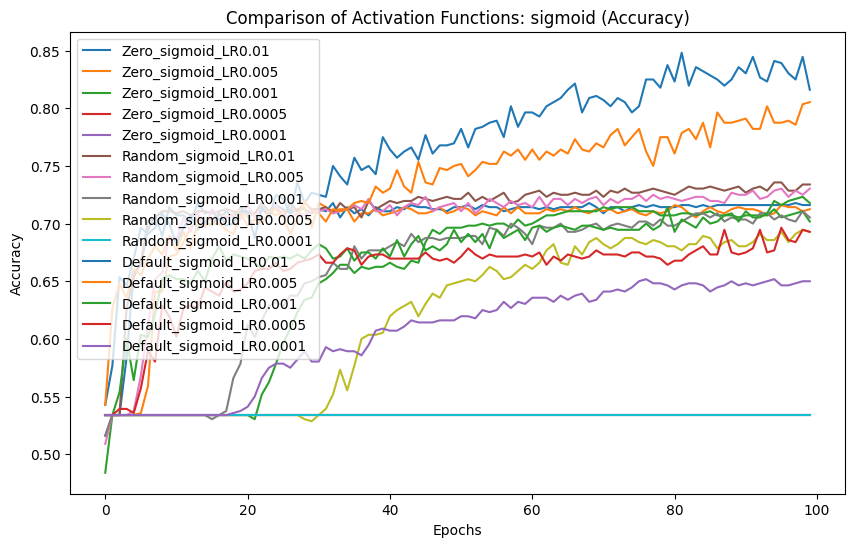

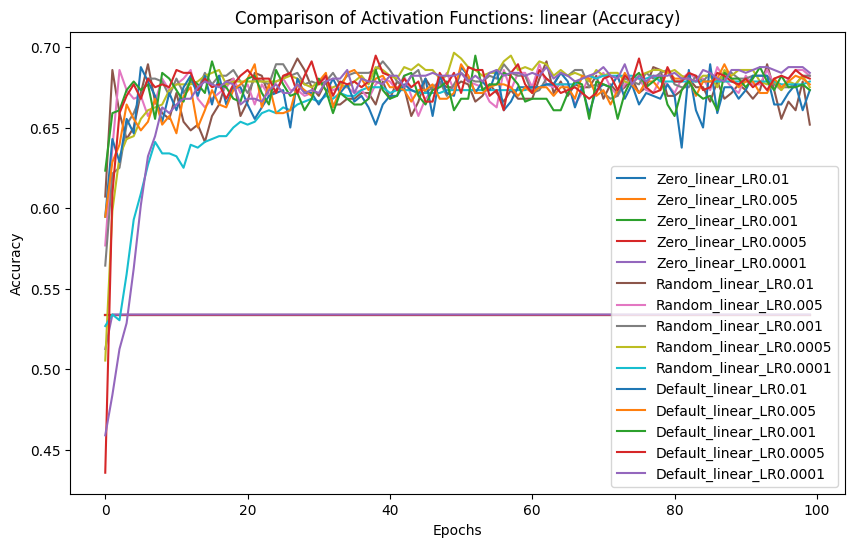

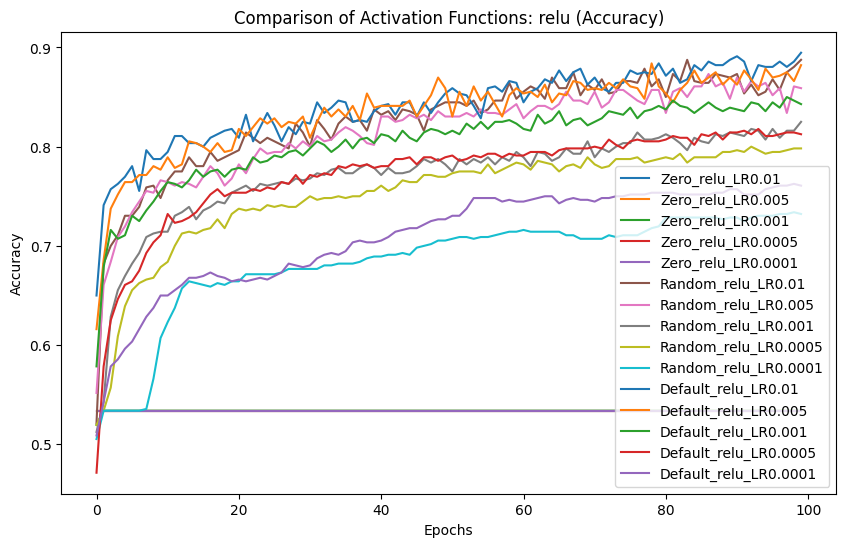

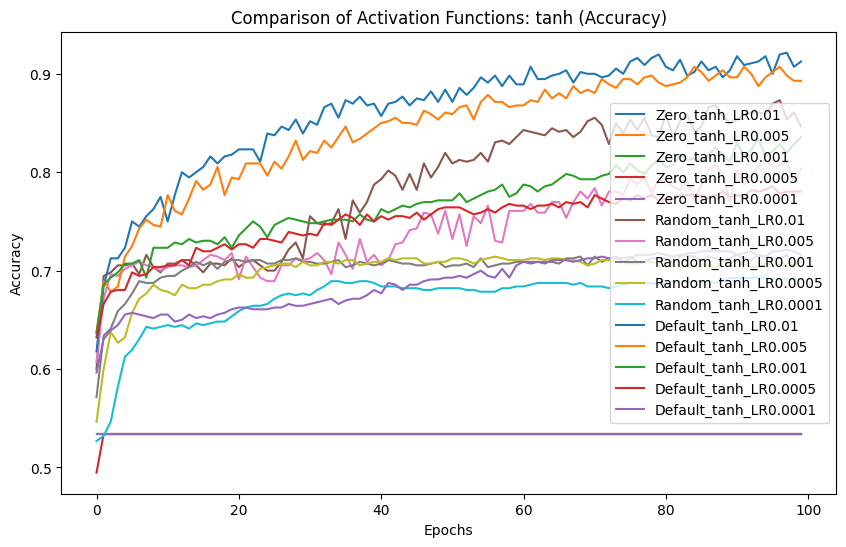

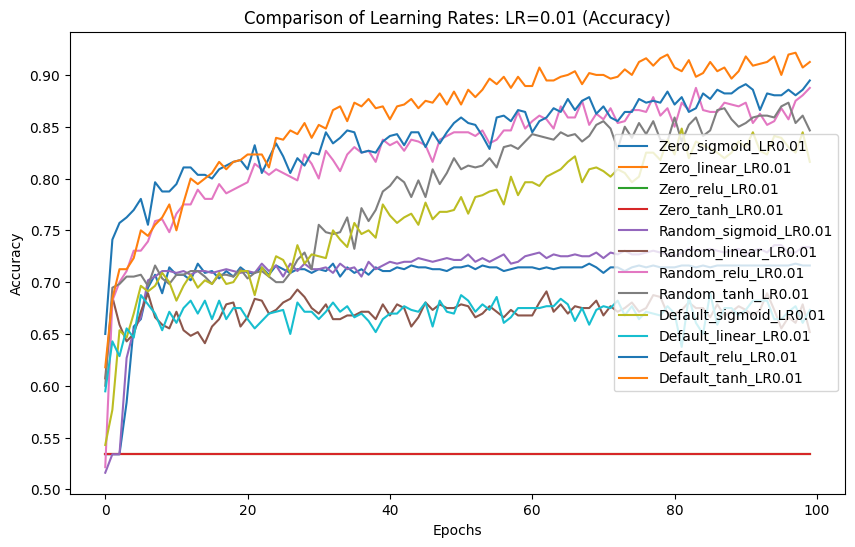

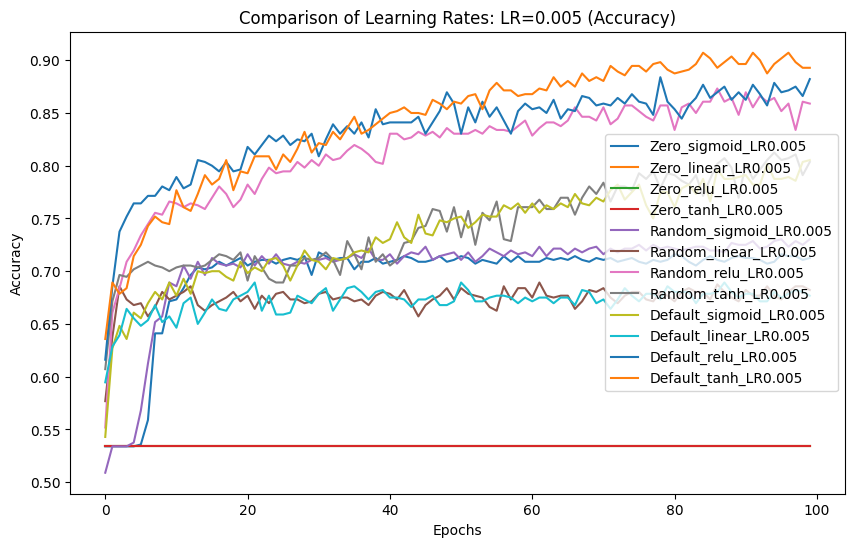

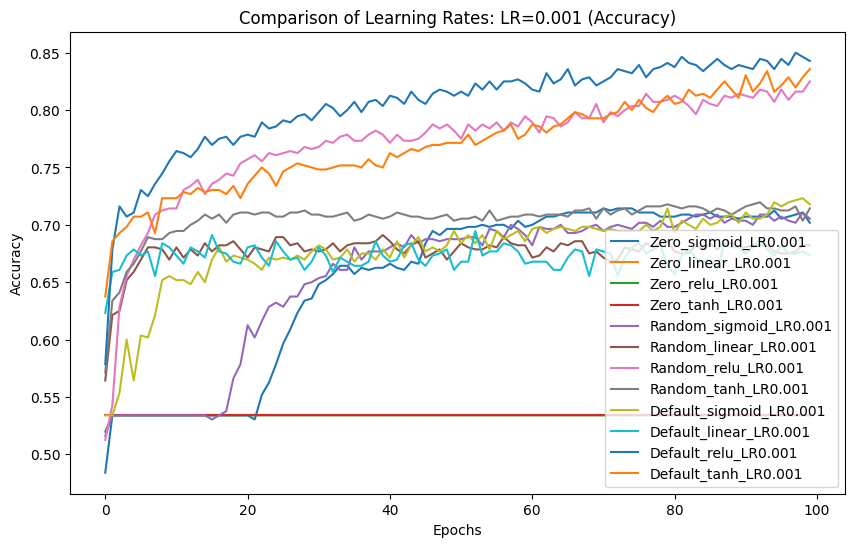

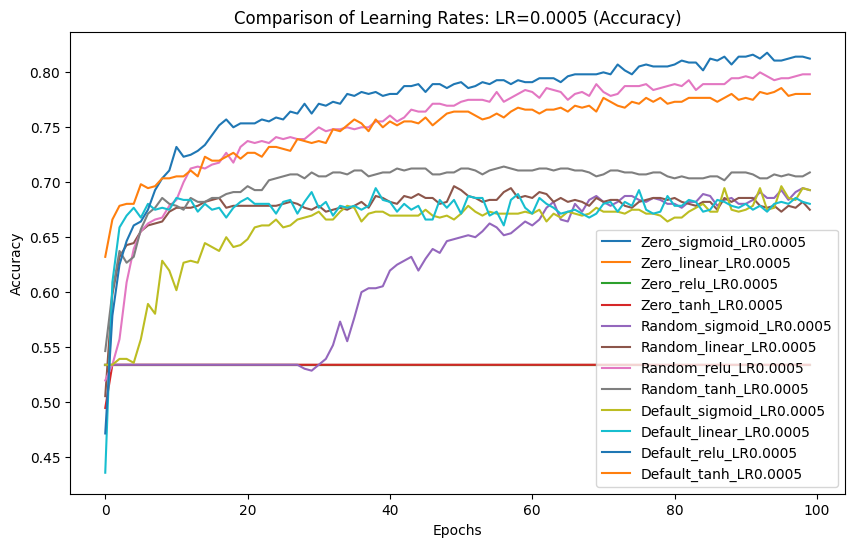

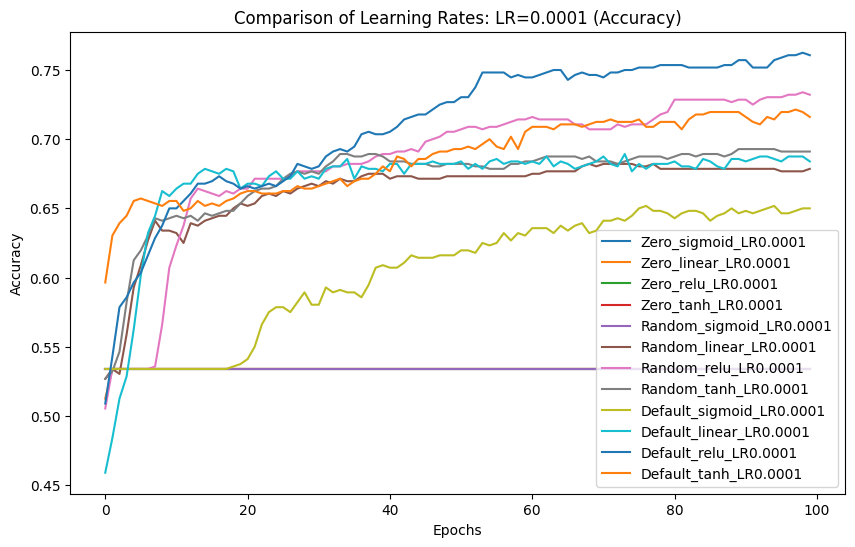

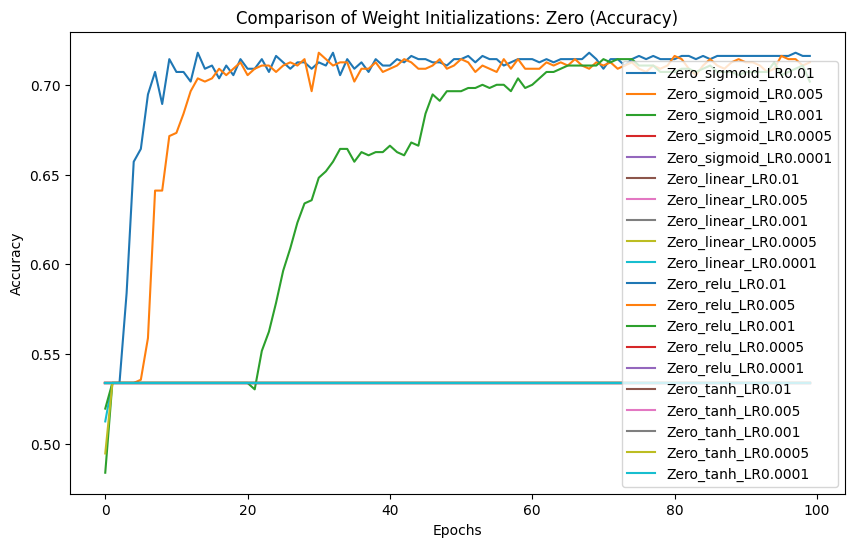

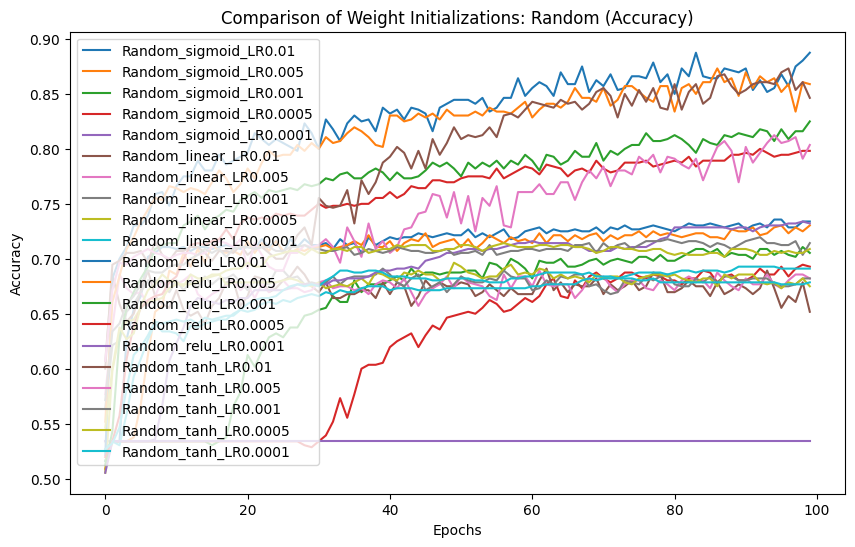

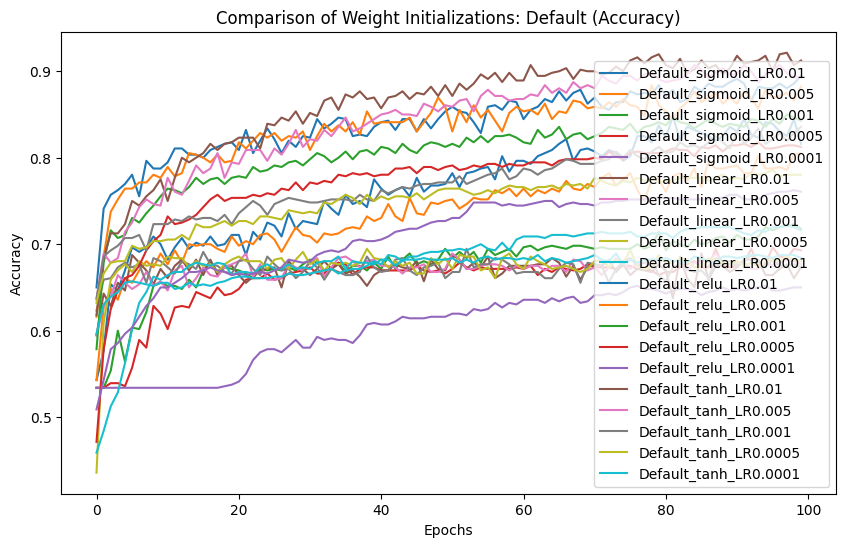

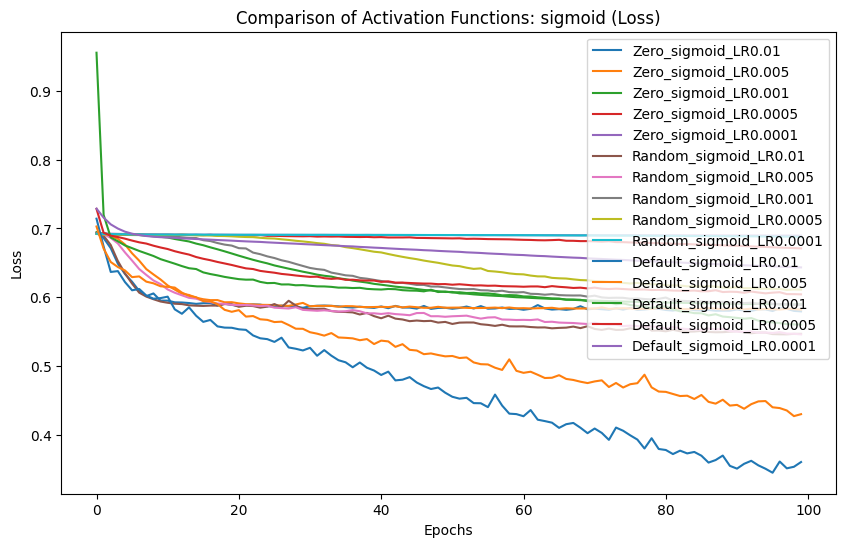

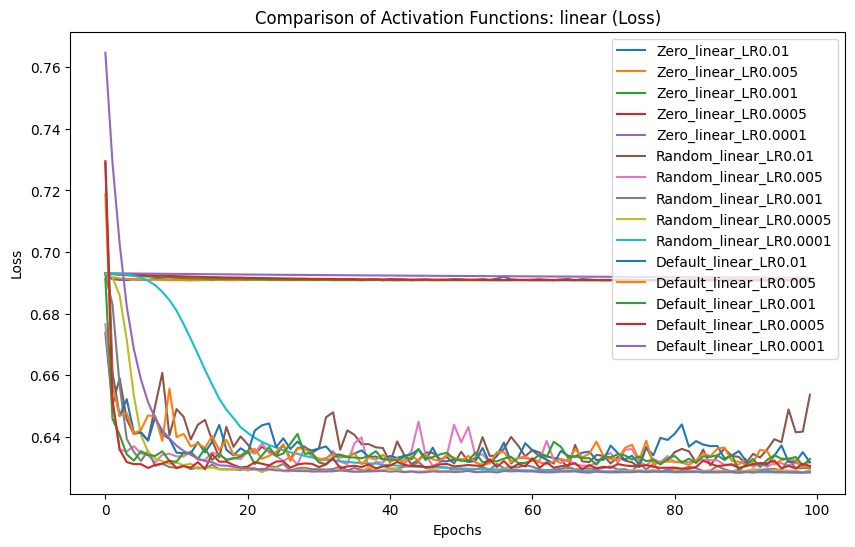

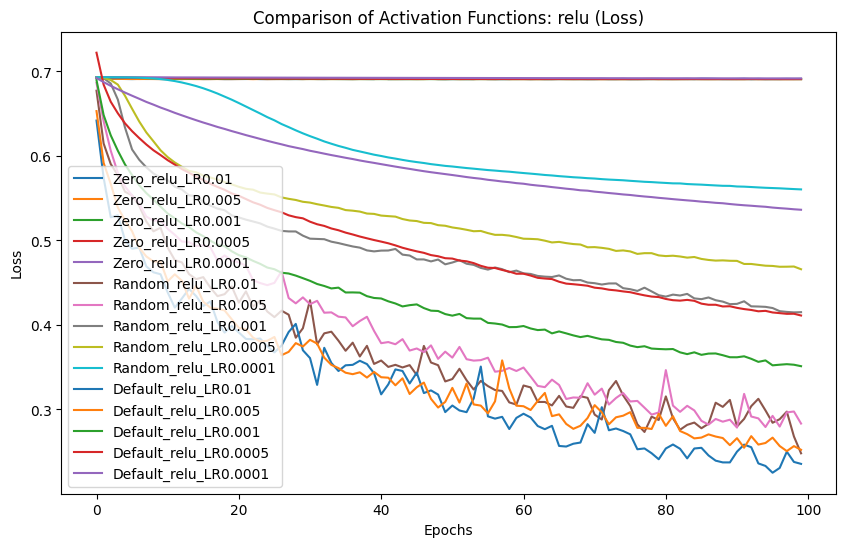

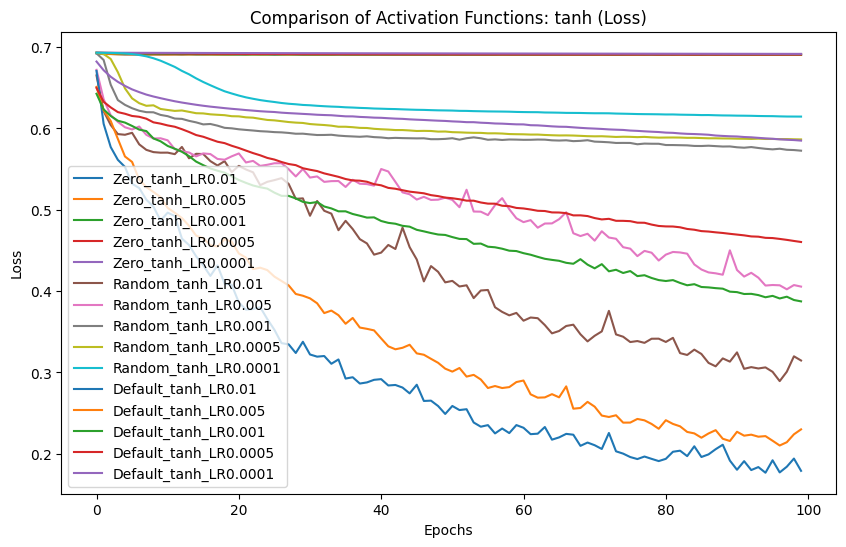

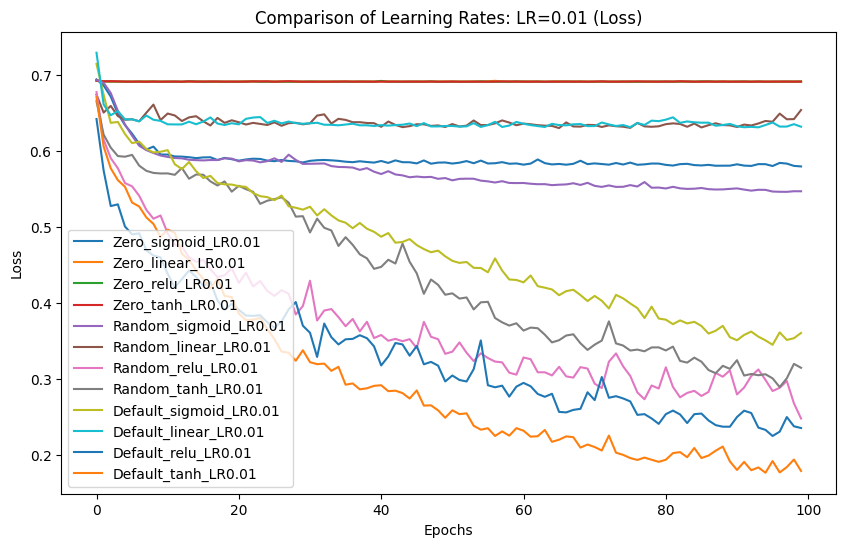

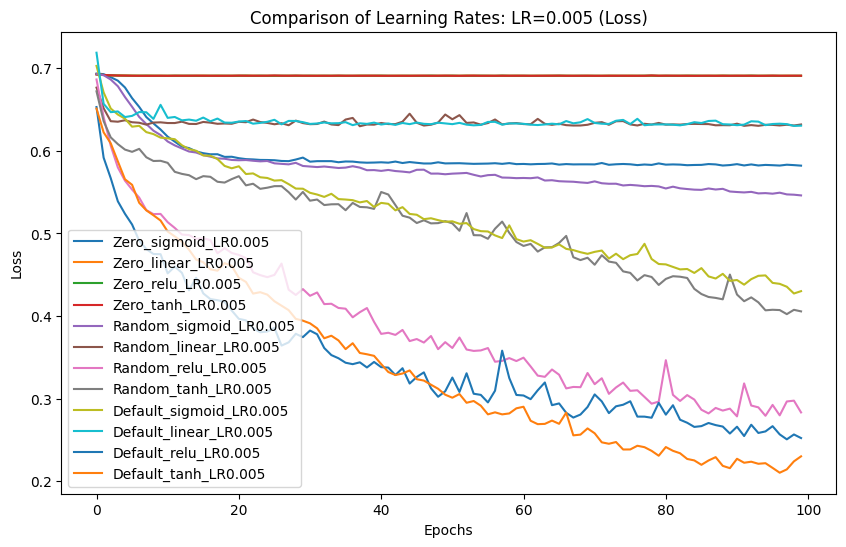

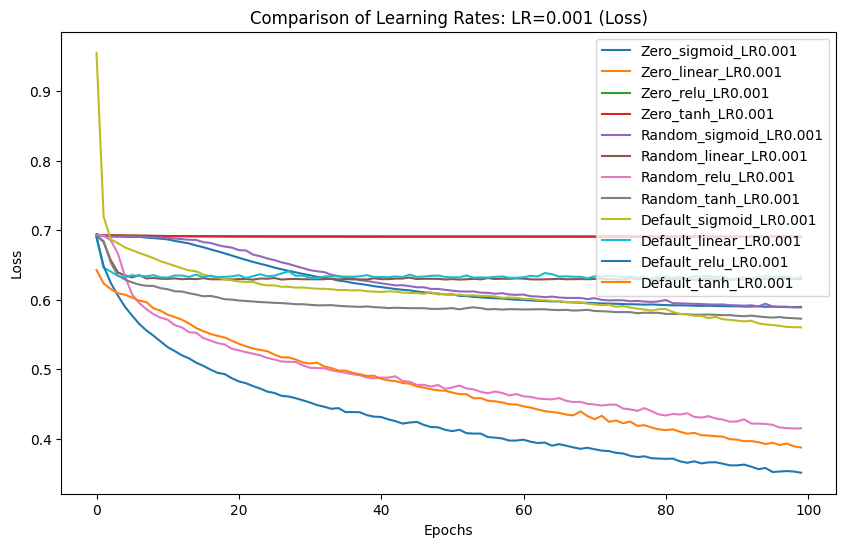

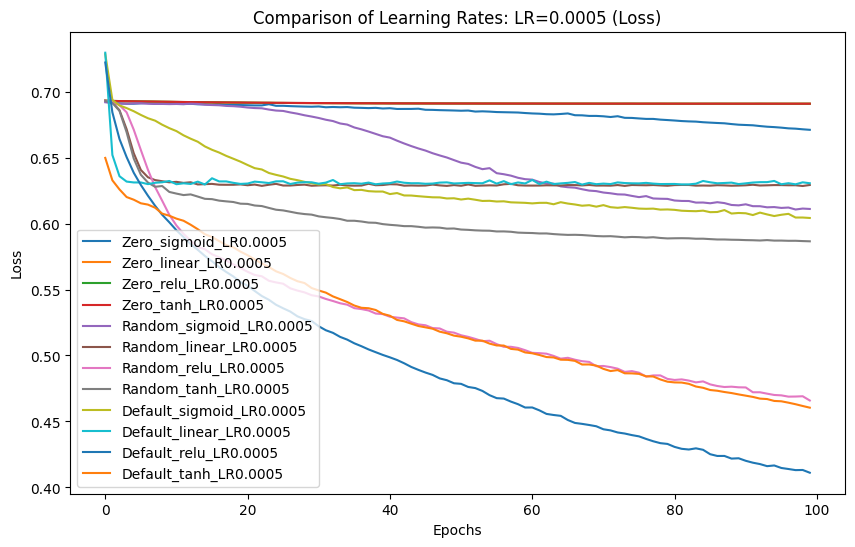

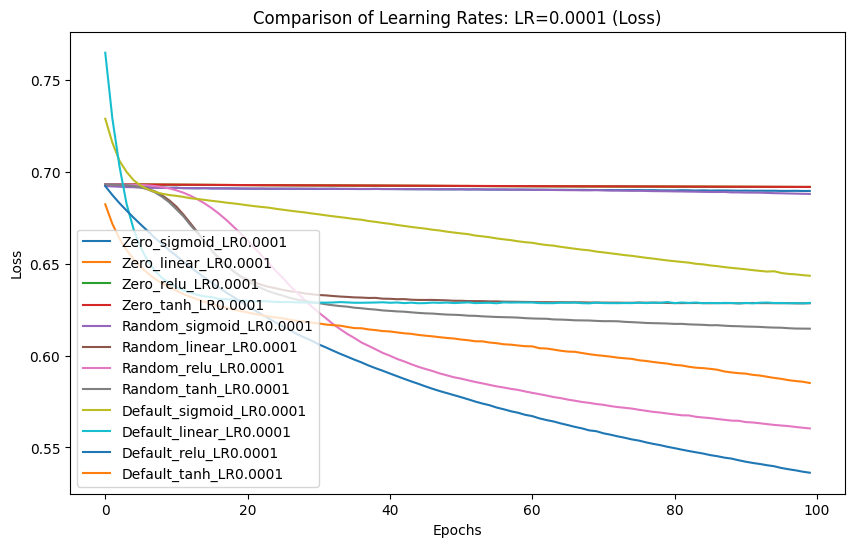

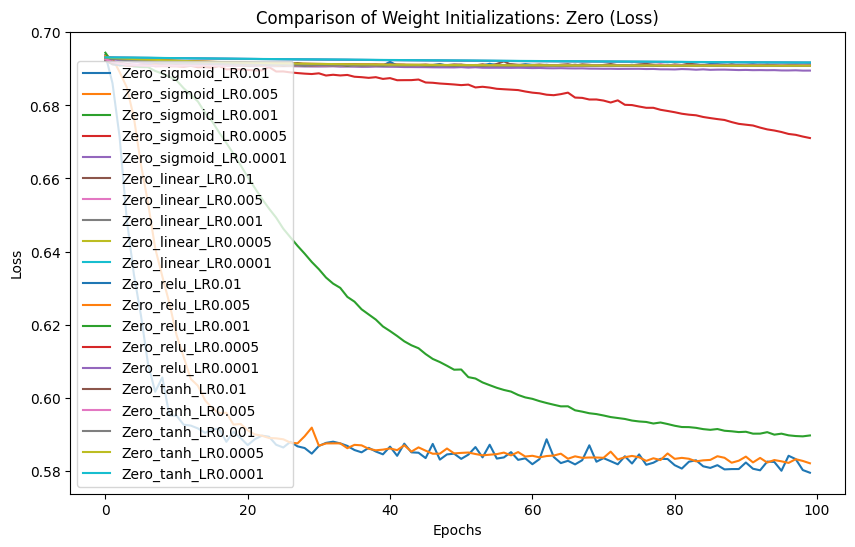

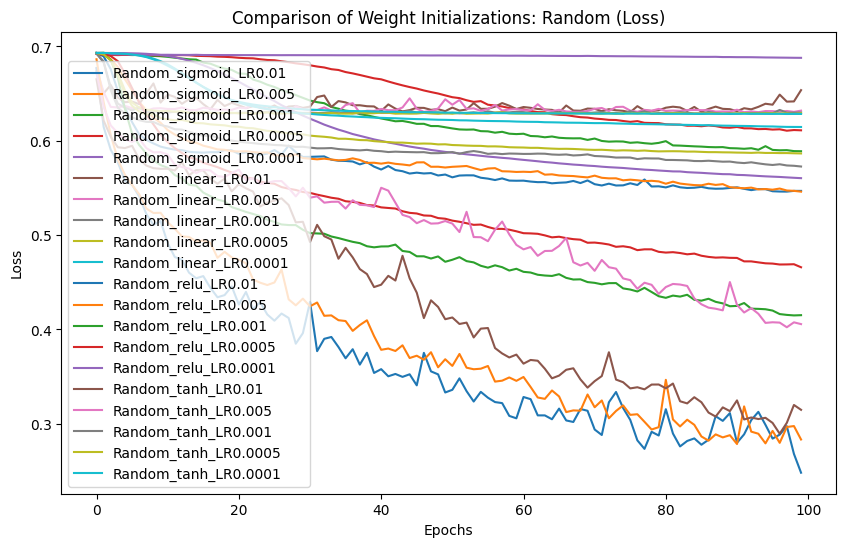

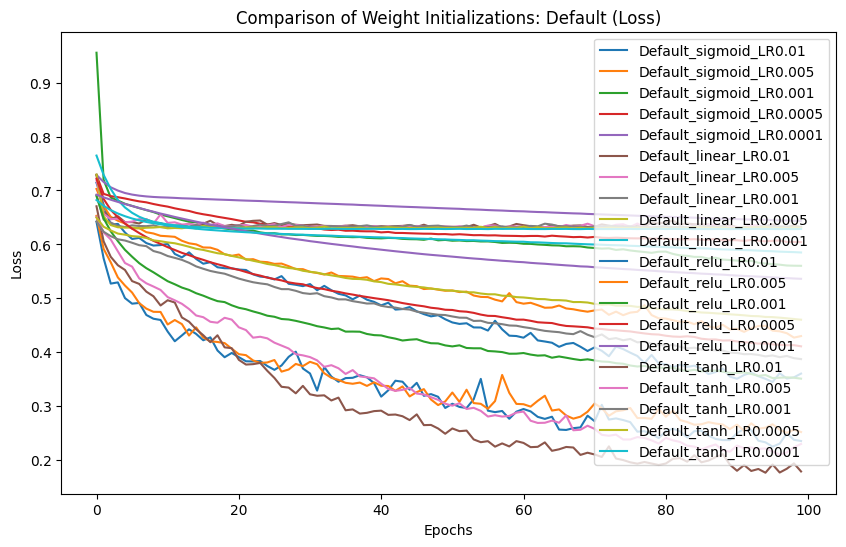

Top 5 Configurations by Validation Accuracy:
Configuration: Random_relu_LR0.01, Accuracy: 0.8071
Configuration: Default_relu_LR0.001, Accuracy: 0.8071
Configuration: Default_tanh_LR0.01, Accuracy: 0.8071
Configuration: Default_tanh_LR0.005, Accuracy: 0.8071
Configuration: Random_tanh_LR0.01, Accuracy: 0.8000


In [20]:
def filter_results(results, filter_key, metric='accuracy'):
    filtered = {k: v[metric] for k, v in results.items() if filter_key in k}
    return filtered

# Function to plot results for a specific parameter
def plot_comparison(filtered_results, title, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    for key, values in filtered_results.items():
        plt.plot(values, label=key)
    plt.title(f'{title} ({metric.capitalize()})')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


# Compare Activation Functions
for activation in activations:
    filtered = filter_results(results, f"_{activation}_", metric='accuracy')
    plot_comparison(filtered, f'Comparison of Activation Functions: {activation}')

# Compare Learning Rates
for lr in learning_rates:
    filtered = filter_results(results, f"LR{lr}", metric='accuracy')
    plot_comparison(filtered, f'Comparison of Learning Rates: LR={lr}')

# Compare Weight Initializations
for initializer_name in initializers.keys():
    filtered = filter_results(results, initializer_name, metric='accuracy')
    plot_comparison(filtered, f'Comparison of Weight Initializations: {initializer_name}')


for activation in activations:
    filtered = filter_results(results, f"_{activation}_", metric='loss')
    plot_comparison(filtered, f'Comparison of Activation Functions: {activation}', metric='loss')

for lr in learning_rates:
    filtered = filter_results(results, f"LR{lr}", metric='loss')
    plot_comparison(filtered, f'Comparison of Learning Rates: LR={lr}', metric='loss')

for initializer_name in initializers.keys():
    filtered = filter_results(results, initializer_name, metric='loss')
    plot_comparison(filtered, f'Comparison of Weight Initializations: {initializer_name}', metric='loss')


def find_top_5(results):
    final_accuracies = [(k, np.max(v['val_accuracy'])) for k, v in results.items()]
    top_5 = sorted(final_accuracies, key=lambda x: x[1], reverse=True)[:5]
    return top_5

print("Top 5 Configurations by Validation Accuracy:")
for config, accuracy in top_5_accuracies:
    print(f"Configuration: {config}, Accuracy: {accuracy:.4f}")


